### Data Science 1 Assignment Solutions
by Yahya Kocakale

#### Q1
a)

While the ridge estimator of $\beta_{0}$ is as following:

$$
\hat{\beta}_{0}^{ridge} = \sum \limits _{i=1} ^{n} Y_{i}/(n+\lambda)
$$

The estimator of $\beta_{0}$ in case of OLS would be as following:

$$
\hat{\beta}_{0} = \sum \limits _{i=1} ^{n} Y_{i}/n = \bar{Y}
$$

While OLS regression with intercept only is equal to mean of dependent variable, ridge estimator would be less than the mean (depends on magnitude of $\lambda$). While the mean of dependent variable is an unbiased estimator of $Y$, ridge estimator would be a biased estimator of $Y$.

b)

In [25]:
import numpy as np
import pandas as pd

np.random.seed(20240313)

# Define true beta and noise variance
beta_0 = 1
sigma_sq = 4

# Sample size
n = 20

# Generate random noise
noise = np.random.normal(0, np.sqrt(sigma_sq), n)

# Generate target variable (Y) with true beta and noise
Y = beta_0 + noise

# Define grid of lambda values
lambda_grid = np.linspace(0, 20, 20)# 100 values from 0 to 20

# Iterate through lambda values and compute Ridge estimator
predicted_y_hat = []
for lambda_val in lambda_grid:
    y_hat = Y.sum()/(lambda_val+n)

    # Append predicted value to list
    predicted_y_hat.append(y_hat)

# Create DataFrame with lambda values and predicted Y values
result_df = pd.DataFrame({'Lambda': lambda_grid, 'Predicted_Y_hat': predicted_y_hat})

# Print the DataFrame
result_df

,Lambda,Predicted_Y_hat
0,0.000000,1.552025
1,1.052632,1.474424
2,2.105263,1.404213
3,3.157895,1.340385
4,4.210526,1.282108
5,5.263158,1.228687
6,6.315789,1.179539
7,7.368421,1.134172
8,8.421053,1.092166
9,9.473684,1.053160


In [27]:
Y.sum()

31.040501816083605

c)

In [44]:
# Number of simulations
n_simulations = 10

# Initialize dictionaries to store results per lambda
lambda_results = {}
for lambda_val in lambda_grid:
  lambda_results[lambda_val] = {"bias_sq": [], "variance": [], "mse": []}

for sim_iter in range(n_simulations):

  # Generate random noise
  noise = np.random.normal(0, np.sqrt(sigma_sq), n)

  # Generate target variable (Y) with true beta and noise
  Y = beta_0 + noise

  for lambda_val in lambda_grid:
    # Compute ridge regression estimate manually
    y_hat = Y.sum() / (lambda_val + n)

    # Analytical variance calculation for ridge with design matrix of ones
    var_i = sigma_sq / (n * (1 + lambda_val / sigma_sq))

    # Store results for this lambda in the current simulation
    lambda_results[lambda_val]["bias_sq"].append((beta_0 - y_hat)**2)
    lambda_results[lambda_val]["variance"].append(var_i)
    lambda_results[lambda_val]["mse"].append((beta_0 - y_hat)**2 + var_i)

# After simulations, calculate averages for each lambda
for lambda_val, results in lambda_results.items():
  lambda_results[lambda_val]["bias_sq"] = np.mean(results["bias_sq"])
  lambda_results[lambda_val]["variance"] = np.mean(results["variance"])
  lambda_results[lambda_val]["mse"] = np.mean(results["mse"])

# Create DataFrame from results
data = {'Lambda': list(lambda_results.keys()), 
        'Avg. Bias^2': [v["bias_sq"] for v in lambda_results.values()], 
        'Avg. Var': [v["variance"] for v in lambda_results.values()], 
        'Avg. MSE': [v["mse"] for v in lambda_results.values()]}
df = pd.DataFrame(data)

# Print DataFrame
print(df)

       Lambda  Avg. Bias^2  Avg. Var  Avg. MSE
0    0.000000     0.164947  0.200000  0.364947
1    1.052632     0.159004  0.158333  0.317338
2    2.105263     0.157954  0.131034  0.288989
3    3.157895     0.160565  0.111765  0.272330
4    4.210526     0.165916  0.097436  0.263352
5    5.263158     0.173308  0.086364  0.259672
6    6.315789     0.182211  0.077551  0.259762
7    7.368421     0.192215  0.070370  0.262586
8    8.421053     0.203009  0.064407  0.267416
9    9.473684     0.214349  0.059375  0.273724
10  10.526316     0.226047  0.055072  0.281119
11  11.578947     0.237957  0.051351  0.289308
12  12.631579     0.249966  0.048101  0.298067
13  13.684211     0.261986  0.045238  0.307224
14  14.736842     0.273948  0.042697  0.316645
15  15.789474     0.285800  0.040426  0.326226
16  16.842105     0.297503  0.038384  0.335887
17  17.894737     0.309026  0.036538  0.345564
18  18.947368     0.320346  0.034862  0.355208
19  20.000000     0.331447  0.033333  0.364780


d)

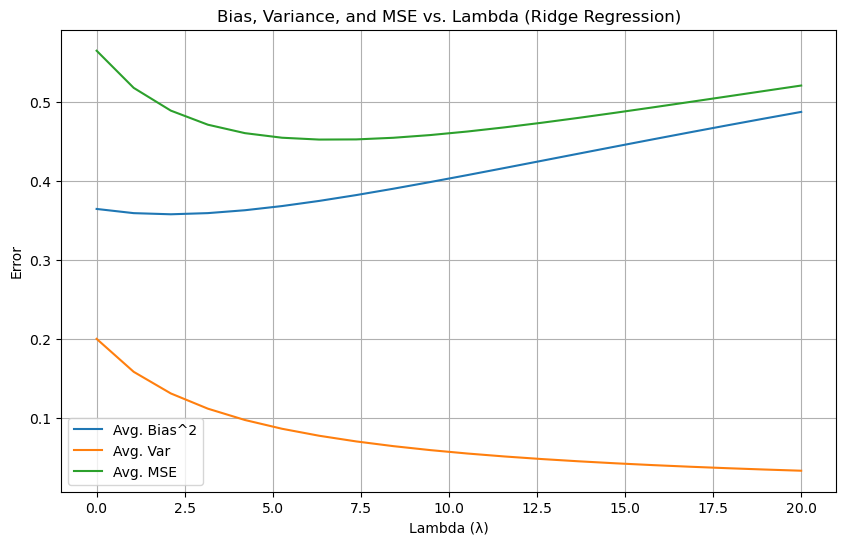

In [42]:
import matplotlib.pyplot as plt

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(lambda_grid, df['Avg. Bias^2'], label='Avg. Bias^2')
plt.plot(lambda_grid, df['Avg. Var'], label='Avg. Var')
plt.plot(lambda_grid, df['Avg. MSE'], label='Avg. MSE')
plt.xlabel('Lambda (λ)')
plt.ylabel('Error')
plt.legend()
plt.title('Bias, Variance, and MSE vs. Lambda (Ridge Regression)')
plt.grid(True)
plt.show()

The plot shows the trade-off between bias and variance with increasing regularization strength (lambda).

* **Bias^2:** Bias^2 increases steadily. As lambda increases, the model becomes more regularized, shrinking the coefficient estimates. This reduces variance but can also introduce bias, causing the predicted beta to deviate from the true beta (beta_0).
* **Var:** Initially, variance is high. As lambda increases, the model shrinks the coefficients, reducing the variance of the estimates. This is because the model relies less on specific data points and becomes smoother.
* **MSE:** MSE (mean squared error) reflects the overall prediction error. It's the sum of bias^2 and variance. The plot shows a U-shaped curve for MSE. At low lambda, high variance dominates the error. As lambda increases, variance reduces, but bias starts to increase. The optimal lambda value lies somewhere in the middle, where the MSE is minimized.

Ridge regression is a regularization technique that adds a penalty term to the OLS objective function. This penalty term helps to mitigate multicollinearity and overfitting by shrinking the coefficients towards zero. This can be particularly useful when dealing with multicollinear predictors or when the number of predictors is close to or exceeds the number of observations.

In situations where multicollinearity is present, ridge regression can often outperform OLS by reducing the variance of the parameter estimates, thus potentially improving prediction accuracy. However, if multicollinearity is not an issue and the linear model assumptions are met, OLS might perform just as well or even better than ridge regression because it provides unbiased estimates of the regression coefficients.

#### Q2)

Suppose we estimate the regression coefficients in a linear regression model by minimizing

$$
 \sum_{i=1}^{n}\left((y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij}) \right)^2 \quad \text{subject to} \quad \sum_{j=1}^{p} |\beta_j| \leq s
$$

for a particular value of s.

a) As we increase s from 0, the training RSS will: iv) Steadily decrease. This decrease occurs because as s increases, we impose a smaller constraint on the coefficients Betas. Consequently, the coefficients tend to approach their least squares estimates, allowing the model to become more flexible. This increased flexibility leads to a continual decrease in the training RSS (we do not prevent the model to overfit).

b) As we increase s from 0, the test RSS will ii) Decrease initially, and then eventually start increasing in a U shape. As we gradually increase the value of s from 0, we impose a smaller restriction on the coefficients $\beta_j$. This flexibility initially results in a decrease in the test residual sum of squares (RSS), followed by an increase, forming a typical U-shaped curve.

c) As we increase s from 0, variance will iii) Steadily increase As we progressively increase s from 0, we impose a smaller constraint on the coefficients $\beta_j$. Consequently, the model becomes increasingly flexible, leading to a consistent increase in variance.

d) As we increase s from 0, (squared) bias will:  iv) Steadily decrease. Again as s increases from 0, we impose less constraint on the coefficients  $\beta_j$. Consequently, the model becomes more flexible, resulting in a consistent decrease in bias (we do not prevent the model to overfit, or level of prevention decreases).

e) As we increase s from 0, irreducible error: v) Remain constant. The irreducible error is the noise or randomness in data generating process error and remains unaffected by the model (actually cannot be modeled), and therefore, it remains unaffected by the value of s.

#### Q3)
a)

In [46]:
# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/kocakale/hello-world/master/PCA_data.csv")

print("Complete sample shape:", data.shape)

# Extract the training and testing samples
train_data = data.iloc[:500]
test_data = data.iloc[-500:]

print("Training sample shape:", train_data.shape)
print("Testing sample shape:", test_data.shape)

Complete sample shape: (1000, 51)
Training sample shape: (500, 51)
Testing sample shape: (500, 51)


In [47]:
data.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50
0,-6.539179,0.948014,1.259177,0.763472,0.128735,0.410222,0.420989,-0.101123,-1.242581,0.029933,...,-0.859282,-1.645036,-0.247500,1.372374,-0.212618,-1.368046,-1.740719,0.925212,0.123907,-1.020763
1,2.036508,0.019661,-1.951131,-1.097787,0.919061,-0.069719,0.405042,1.808955,-0.343013,1.465924,...,-1.809128,0.381091,0.497534,0.632532,-1.429868,-2.092106,0.499216,1.026407,-0.763639,-0.405548
2,7.295433,0.283019,1.127620,1.458154,0.227844,-2.003859,-1.775359,-2.480777,0.506680,0.852822,...,0.091664,0.655664,-0.191965,1.194055,0.326962,0.399151,0.723069,0.939017,-1.132469,0.212292
3,6.825405,0.845641,-0.921489,-1.368601,2.085195,-0.294420,1.029018,0.098418,-0.677591,-1.276767,...,-0.280935,-0.523440,-0.230028,1.939640,-0.429125,0.701319,-1.008541,1.055334,-0.782659,0.749695
4,-0.176432,0.566670,0.667277,-0.248455,1.361258,0.041326,0.149155,-0.271543,0.229179,0.089760,...,-0.728898,-0.124473,-0.842829,-0.132558,-0.236122,-0.751535,0.191009,0.007180,-0.350858,0.384321


b)

In [48]:
from sklearn.decomposition import PCA

# Selecting only the columns from the second column onwards
data_for_pca = data.iloc[:, 1:]

# Perform PCA on the selected dataset
pca = PCA(n_components=10)  # Set number of components to 10
pca.fit(data_for_pca)

# Compute the principal component vectors
principal_components = pca.components_

# Compute the principal component scores for the entire dataset
principal_component_scores = pca.transform(data_for_pca )

# Print the shapes of the principal component vectors and scores
print("Shape of principal component vectors:", principal_components.shape)
print("Shape of principal component scores:", principal_component_scores.shape)

Shape of principal component vectors: (10, 50)
Shape of principal component scores: (1000, 10)


In [49]:
pd.DataFrame(principal_components)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.027387,-0.098020,-0.269744,0.181046,0.246482,0.282823,0.198562,-0.085632,-0.140379,0.132491,...,0.065853,-0.019035,-0.079063,0.126562,0.037256,-0.220344,0.082252,0.170688,0.148155,-0.074001
1,-0.381373,-0.150502,-0.218536,-0.225906,0.246900,-0.096144,0.169221,0.284435,-0.034900,-0.159718,...,0.101879,0.000302,-0.014569,-0.028299,0.022736,0.068511,0.048711,-0.058445,-0.033570,0.061780
2,0.135455,-0.151683,0.091704,-0.265128,-0.023357,0.273531,-0.015595,-0.225426,-0.336526,-0.240375,...,-0.124930,-0.082045,0.150568,0.038968,0.068967,0.018210,0.026861,0.050563,-0.014486,0.022800
3,0.072821,0.363308,0.142877,0.047319,0.066819,0.028402,-0.136384,0.018643,-0.223713,-0.036722,...,0.074048,0.121794,0.118764,0.043430,0.191967,-0.072060,-0.043032,-0.128408,-0.061159,0.136403
4,0.007024,0.058495,0.106002,-0.179083,0.137090,0.059248,0.248162,-0.102069,0.116152,0.154060,...,-0.117559,-0.166363,0.045958,-0.265675,-0.011809,0.037926,-0.214856,-0.104622,0.077517,-0.003688
5,-0.122263,0.031870,-0.147917,0.064602,0.183527,-0.042450,0.200205,0.110942,0.032981,0.244227,...,-0.300020,0.311073,0.027125,0.042557,-0.010351,0.052265,0.152032,-0.034547,-0.088280,0.212683
6,0.008255,-0.118745,0.086215,-0.019012,-0.208943,-0.077977,0.015355,0.061867,0.042029,0.096511,...,0.027766,0.201443,-0.121948,-0.139761,0.226457,-0.205531,-0.040311,0.278004,-0.058872,0.072655
7,0.088624,0.064691,0.083605,-0.028516,0.010950,0.159380,-0.046206,-0.011259,0.056364,-0.059896,...,-0.038541,-0.053670,-0.003525,-0.251139,0.137805,0.073288,-0.240099,0.057159,0.083136,0.032090
8,-0.004524,0.127439,0.079970,-0.071861,0.046680,-0.057785,-0.074370,-0.058453,0.163148,-0.168188,...,-0.078800,-0.079654,-0.142207,0.112399,0.199707,-0.105597,0.087726,-0.066638,-0.144544,0.120043
9,0.035516,-0.042228,0.078200,-0.026768,-0.048207,-0.058648,0.201471,-0.042331,0.068509,0.042266,...,0.230127,-0.029314,-0.264977,-0.080253,0.189824,0.014096,0.074382,-0.093982,-0.115178,-0.179345


In [50]:
pd.DataFrame(principal_component_scores)

,0,1,2,3,4,5,6,7,8,9
0,1.550957,-2.970281,0.266931,0.174905,1.976533,-1.986773,-0.618811,-1.886173,1.267789,-1.055589
1,2.796632,-2.478406,-0.537754,-4.003418,1.002937,1.761132,1.315558,-2.160971,-0.367547,-0.713611
2,-4.258702,-2.646898,0.101036,0.671717,-5.052483,1.808161,0.567196,1.009530,0.343479,0.216567
3,2.640444,-2.964102,0.645759,-0.164768,-2.899882,1.728583,-0.551543,-0.360779,-1.430756,1.046878
4,0.588698,-1.423326,-1.484493,0.391902,-1.639247,0.555400,-0.635212,1.146812,-0.610385,0.757825
...,...,...,...,...,...,...,...,...,...,...
995,-5.271244,-1.862333,1.395786,1.796356,-0.152609,-1.018832,1.416505,0.175896,0.366758,1.966468
996,1.419875,1.342245,2.643950,0.308932,-2.925716,1.377737,-2.404207,0.248670,-1.223590,-1.437680
997,-0.838082,4.706940,1.036514,1.926721,-1.571925,-0.500653,3.292465,-0.967919,-2.120489,-0.768788
998,0.859131,-0.015351,0.881794,0.193029,0.438718,-1.541520,0.762893,-3.618981,2.574746,1.067443


c)

In [51]:
import statsmodels.api as sm

# Define the independent variables (including the constant)
X_train = sm.add_constant(train_data.drop(columns=['Y']))

# Define the dependent variable
Y_train = train_data['Y']

# Fit the OLS regression model
ols_model_X = sm.OLS(Y_train, X_train)
ols_results_X = ols_model_X.fit()

# Print the summary of the regression results
print(ols_results_X.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     28.25
Date:                Fri, 15 Mar 2024   Prob (F-statistic):          4.65e-109
Time:                        00:27:12   Log-Likelihood:                -1028.1
No. Observations:                 500   AIC:                             2158.
Df Residuals:                     449   BIC:                             2373.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9368      0.093     10.104      0.0

In [52]:
# Extract the principal component scores
Z_train = principal_component_scores[:500]

# Fit the OLS regression models for different values of k
for k in [1, 5, 10]:
    # Select the first k principal components
    Z_k = Z_train[:, :k]

    # Add a constant to the principal component scores
    Z_k = sm.add_constant(Z_k)

    # Fit the OLS regression model
    ols_model_Z = sm.OLS(Y_train, Z_k)
    ols_results_Z = ols_model_Z.fit()

    # Print the summary of the regression results
    print(f"OLS Regression Results for k = {k}:")
    print(ols_results_Z.summary())

OLS Regression Results for k = 1:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2121
Date:                Fri, 15 Mar 2024   Prob (F-statistic):              0.645
Time:                        00:27:12   Log-Likelihood:                -1383.5
No. Observations:                 500   AIC:                             2771.
Df Residuals:                     498   BIC:                             2779.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0

d)

In [53]:
# Define the independent variables for the test sample
X_test = sm.add_constant(test_data.drop(columns=['Y']))

# Define the dependent variable for the test sample
Y_test = test_data['Y']

# Initialize lists to store mean squared prediction errors
mse_results = []

# Predictions using the model with X1, ..., X50
Y_pred_X = ols_results_X.predict(X_test)
mse_X = np.mean((Y_test - Y_pred_X) ** 2)
mse_results.append(mse_X)

# Extract the principal component scores
Z_train = principal_component_scores[:500]
Z_test = principal_component_scores[-500:]

# Predictions using the models with Z1*, ..., Zk* for k = 1, 5, 10
for k in [1, 5, 10]:
    
    # Select the first k principal components
    Z_k = Z_train[:, :k]

    # Add a constant to the principal component scores
    Z_k = sm.add_constant(Z_k)

    # Fit the OLS regression model
    ols_model_Z = sm.OLS(Y_train, Z_k)
    ols_results_Z = ols_model_Z.fit()
    
    # Select the first k principal components for the test sample
    Z_k_test = Z_test[:, :k]

    # Add a constant to the principal component scores for the test sample
    Z_k_test = sm.add_constant(Z_k_test)

    # Predict Y using the model with Z1*, ..., Zk*
    Y_pred_Z = ols_results_Z.predict(Z_k_test)
    mse_Z = np.mean((Y_test - Y_pred_Z) ** 2)
    mse_results.append(mse_Z)

# Create an empty list to store the results
results_list = []

# Append results for each model to the list
for i, mse in enumerate(mse_results):
    model_name = f"Model {i + 1}"
    results_list.append({'Model': model_name, 'Mean Squared Prediction Error': mse})

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_list)

# Print the DataFrame
results_df

,Model,Mean Squared Prediction Error
0,Model 1,4.334077
1,Model 2,15.006058
2,Model 3,12.924167
3,Model 4,8.454789


e)

Looking at the table, we can see that the MSPE (Mean Squared Prediction Error) is generally lower in the last column (Ntr = 500) compared to the first column (Ntr = 75) for all the methods listed. This means that the prediction performance is better when the training size (Ntr) is larger.

There are a couple of possible reasons for this. First, with a larger training size, the model has more data to learn from and can capture the underlying relationships between the variables more accurately. This leads to better predictions on unseen data.

Second, with a smaller training size, the model is more likely to overfit the training data. Overfitting occurs when the model learns the idiosyncrasies of the training data too well, and it is not able to generalize well to unseen data. This can lead to higher MSPE on unseen data.

Generally, for both Ntr values (75 and 500), MSPE tends to decrease as the PCA level increases (using more principal components in model increases the model performance). Since the true data generating process is affected by al X's (explanatory variables), introducing more principal components increase the model performance to a certain degree. 

Another observation is that MSPE does not decrease much for models with PCA as training size increases, while the MSPE of OLS model without PCA decreases dramatically. PCA identifies and retains features based on the explained variance. There's a possibility that some informative features, though not contributing the most significant variance, might still be crucial for accurate predictions and we exclude this features in models with PCA. 